In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
# to group all the data points by their respective value of a a prticular column - groupby 
# df['col'].agg( function ) -> applies a function(numpy fun like mean , count , etc) to all the elemnts of a column of a dataframe 

df.groupby(['area_type'])['area_type'].agg('count') # gives no of datapoints under each discrete value of column 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# drop irrelavant featres 

df1 = df.drop(['availability' , 'society' , 'balcony'] , axis=1)
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# .isnull().sum()
# null cvval in dataset
df1.isnull().sum()


area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1 = df1.dropna()
df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
# .unique() to find all values in a column 
df1['size'].unique()

# BHK = Bedroom , so make a new feature( taking only numerical value attached to bhk/bedroom)

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
# column.apply(lambda_function ) = to transform all data in col acc. to the lambda function 
# split the string '2 BHK' into 2 parts (tokens) and take first one and type -c ast it into int .
# use new updated daaframe
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0]) )

In [10]:
df1.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
# using Domain knowledge

# df.columns to access columns of dataframe 
# and then to find which data points(rows) satisfy it , use df[df.columns]
df1[df1.bhk>20]

# observe here , there is an error as for less sq feet , bedroom no increases (not psssible) , so remove this error 

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df1['total_sqft'].unique()
# removing the ranges type of value 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def convert2float(x) :
    try :
        float(x)
    except:
        return False 
    return True 

# in exception handling , try( code to be tried on param) and if it returns error , use code inside exception block .

In [15]:
df1[~df1['total_sqft'].apply(convert2float)].head(10) # return the negation of the function (false values rows )

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
df1

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [17]:
# a function to convert ranges to their mean values ( for range data type string/ object)

def convert2num (x) :
    x1 = x.split('-')
    if len(x1)==2 :
        return (float(x1[0])+float(x1[1]))/2

    try :
        return float(x)
    except :
        return None 


In [18]:
df2 = df1.copy()


In [19]:
df2['total_sqft'] = df1['total_sqft'].apply(convert2num)
df2.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [20]:
df2 = df2.dropna()


In [21]:
# use feature engg. to create new features 

df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df2['location'].unique()) # text data is usually discrete
# as no of discrete data is high , it leads to curse of dimensiolity 

1298

In [23]:
# dimensiolity reduction in reagrds to locaytion feature 

df2['location'] = df2['location'].apply(lambda s: s.strip())

# sort_values -  sort the rows by value specified 
loc_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False ) # no of rows in each location 
print(loc_stats) 

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64


In [24]:
# to find location with es than 10 data pointd ( loc stats is pandas series so directly use its name only)

# to find results after using a function over a whole column / series , always enclose the function within original dataframe /sseries with square bracket
len(loc_stats[loc_stats<=10])

1047

In [25]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]
loc_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [26]:
# categorise loc as other is no of data points belonging to it is less than 10 

df2['location'] = df2['location'].apply(lambda x : 'other' if x in loc_stats_less_than_10 else x)

In [27]:
# remove redundant data based on sq_foot per bedroom < 300
df2[df2['total_sqft']/df2['bhk'] < 300 ]

# REMOVE outliers based on propert of data 

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [28]:
# remove the outleirs b just Updating the data frame's columm 
# outlier removale based on - sqft per bedroom 
df2 = df2[ ~( df2['total_sqft']/df2['bhk'] < 300 ) ]


In [29]:
# outlier removal based on price_per_sqft
df2['price_per_sqft'].describe()

# outlier removal based on = 1.5 * IQR

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
out 

NameError: name 'out' is not defined

In [ ]:
out = 1.5 * (6916.666667 - 4210.526316 )

# now remove point that lie beyound this out value 
min_m = 4210.526316 - out 
max_m =  6916.666667 + out 
df2 = df2[ ( df2['price_per_sqft']<max_m  )  ]
df2 = df2[ ( df2['price_per_sqft']  > min_m   )  ]
df2

# or assuming normal distribution , use Q1 to Q3 

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


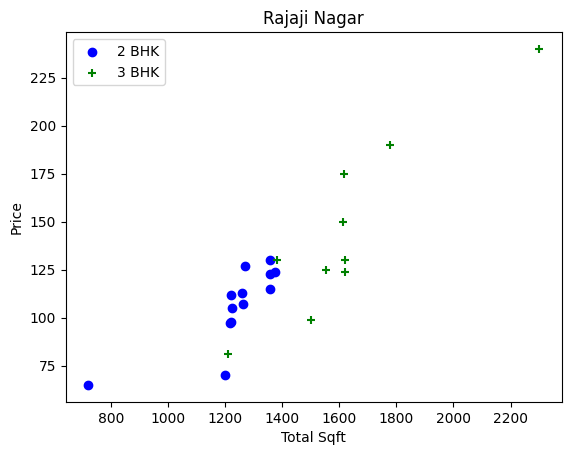

In [ ]:
# outliers = data error  = exceptions in dataset ( anamolies)

# to find further outliers in dataset , use data visualization like scatter plot - outlier e.g. - 2 bhk price higher than 3 bhk for same sq feet 
# at SAME location 

#USE BRACKETS CAREFULLY 

def plot_scatter(df , location ) :
    bhk2 = df[ (df['location']==location) & (df['bhk']==2 )]
    bhk3  = df[ (df['location']==location) & (df['bhk']==3 )]
    plt.scatter(bhk2.total_sqft , bhk2.price , color = "blue" , label="2 BHK" )
    plt.scatter(bhk3.total_sqft , bhk3.price , marker="+" , color = "green" , label="3 BHK" )
    plt.xlabel("Total Sqft")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()


plot_scatter(df2 , "Rajaji Nagar")

# at some points , we see , price of 2 BHK > 3 BHK for same sq ft area , Outlier / exceptions , remove them 


In [ ]:
def remove_bhk_outliers(df) :

    exclude_indices = np.array([])
    for location , location_df in df.groupby('location') :
        bhk_stats = {} # empty dict 
        for bhk , bhk_df in df.groupby('bhk') :
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]

            }
        for bhk , bhk_df in df.groupby('bhk') :
            stats = bhk_stats.get(bhk -1 )
            if stats and stats['count'] > 5 :
                exclude_indices = np.append(exclude_indices , bhk_df.price_per_sqft < (stats['mean']).index.values)
    return df.drop(exclude_indices , axis="index")

# df3 = remove_bhk_outliers(df2)
# for same bhk , after grouping , remove points whose price is less than mean price of 2 bhk . 

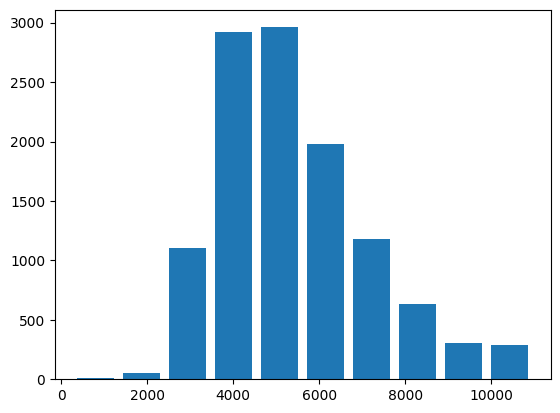

In [ ]:
plt.hist(df2.price_per_sqft , rwidth=0.8)
plt.show()

In [ ]:
# by domain knowledge , remove outliers based on no of baths 

df2 = df2[(df2.bath < df2.bhk + 2)]
df2.shape

(11355, 8)

In [ ]:
# drop features thta represent almost same things , like size and bhk (high corr) 

df2 = df2.drop(['price_per_sqft' , 'size' , 'area_type'] , axis=1)

In [ ]:
# use one hot encoding ./ dummy var to convert location( categorical data ) into numeric data for model 
# directly use pandas - pd.get_dummies(column_name )

dummies = pd.get_dummies(df2.location) # a new df where column of each cTEGORICAL DATA IS A BOOL VALUE THAT SHOWS IF IT BELONGS TO CURRENT DATA POINT OR NOT 

In [ ]:
# in dummy encoding , goes with  1 less column in dummy df 

df3  = pd.concat([df2 , dummies.drop("other" , axis=1)] , axis="columns")
df3.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.keys()

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
# now . drop location col9text_ as we have already done dummy encoding

df4 = df3.drop('location', axis='columns')
df4.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# split the training data into training_features and training_labels 
y = df4.price
X = df4.drop('price' , axis=1)

In [ ]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13315,3453.0,4.0,5,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13317,1141.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4689.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size=0.2 , random_state = 10)

In [ ]:
# Use lin reg model

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train , y_train )
lr.score(X_test , y_test )

0.5265223007429529

In [ ]:
# K fold cross validarion - to find and improve performance of ML model 
from sklearn.model_selection import ShuffleSplit , cross_val_score 

cv = ShuffleSplit(n_splits = 5 , test_size=0.2 , random_state=0)

cross_val_score(LinearRegression() , X , y , cv = cv) # list of model performance in each itr ( for each split)

array([ 6.32558304e-01, -2.16627999e+15,  5.21910127e-01,  5.20739740e-01,
        6.17262118e-01])

In [ ]:
from sklearn.model_selection import GridSearchCV 
 # gridsearch cv - runs our model on variety of ML model and provides model accuracy 

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# give a dict of algo and random param asn grid search will find best model => best params of model too (hyperparaeter tuning 
# )
def run_models_gridsearch(X , y) :
    algos = {

        'linear reg':{
            'model' : LinearRegression() ,
            'params' : {
                # 'normalize' : [True , False ]
                'n_jobs': [1 , 2]
            }
        },

        'lasso' :{
            'model' : Lasso() ,
            'params':{
                'alpha' : [1 , 2] , 
                'selection' : ['random' , 'cyclic'] # hyperparam tuning by random initializ of ml models which we want to test
            }

        },

        'decision tree' :{
            'model' : DecisionTreeRegressor(),
            'params' :{
                'criterion' : ['mse' , 'friedman_mse'] , 
                'splitter' : ['best' , 'random']

            }
            
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
    for algo_name , config in algos.items() :
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score = False )
        gs.fit(X , y)
        scores.append({
            'model' : algo_name , 
            'best_params' : gs.best_params_ , 
            'best_score' : gs.best_score_ 
        })
    
    return pd.DataFrame(scores , columns = ['model' , 'best_params ' , 'best_score' ])


In [ ]:
run_models_gridsearch(X , y)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

,model,best_params,best_score
0,linear reg,NaN,-4.332560e+14
1,lasso,NaN,5.235530e-01
2,decision tree,NaN,5.085833e-01


In [ ]:
# np.where( condition , arr) => to return indices of ele where given condition is true in array (arr)

def predict(location , sqft , bath , bhk) :
    loc_index = np.where(X.columns == location)[0][0]
    # make a sample data point from gven input same form as X 
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath 
    x[2] = bhk
    if loc_index>=0 :
        x[loc_index] =1 
    return lr.predict([x])[0]

In [ ]:
predict("Rajaji Nagar" , 1000 , 3 , 2)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


140.01239106249164

In [ ]:
# Pickle the ML model 

import pickle

# pickle the model in binary format 

with open("code.pickle" , "wb") as f :
    pickle.dump(lr , f) # this pickle fil eonly contains weights and biases of Model , not the training / testing data .

In [ ]:
# Convert the location  array into json and send it also to pickle file 
import json 
columns = {
    'data_columns ' : [col.lower() for col in X.columns]
}
with open("column.json" , "w") as f :
    f.write(json.dumps(columns))